In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib ipympl

df = pd.read_csv('20250313_180802.790_raw_data.csv')
df['reward'].describe()


count    9050.000000
mean        0.570099
std         0.179779
min         0.000022
25%         0.440812
50%         0.568105
75%         0.735978
max         0.873778
Name: reward, dtype: float64

In [2]:
# On step X, you press a button. On step X+1 you get your change in fuel
df['delta_fuel'] =  df['fuel'] - df['fuel'].shift(-1)
df = df.dropna()
df['delta_fuel']

0       0.000000
1       0.000002
2       0.000006
3       0.000017
4       0.000021
          ...   
9044    0.000109
9045    0.000107
9046    0.000116
9047    0.000109
9048    0.000109
Name: delta_fuel, Length: 9049, dtype: float64

In [3]:
df

,steps,currentTime,done,speed,reward,gap,fuel,world_position_y,world_position_x,RPM,...,going_backwards,current_action_abs_0,current_action_abs_1,current_action_abs_2,actions_0,actions_1,actions_2,rl_point,out_of_track,delta_fuel
0,4,84.066,0,0.003190,0.000038,-0.023279,30.000000,527.837280,-1136.205566,1391.627563,...,0.0,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,1322,0.0,0.000000
1,5,84.108,0,0.003218,0.000039,-0.023035,30.000000,527.837280,-1136.205322,1437.904907,...,0.0,0.056378,-0.888597,-1.000000,0.422832,0.232090,-0.878082,1322,0.0,0.000002
2,6,84.147,0,0.017140,0.000205,-0.023032,29.999998,527.837341,-1136.205322,1508.542358,...,0.0,0.105566,-0.542032,-1.000000,0.368914,0.722010,-0.541499,1322,0.0,0.000006
3,7,84.186,0,0.002817,0.000034,-0.022910,29.999992,527.837341,-1136.205200,1676.593140,...,0.0,0.010564,-0.118718,-1.000000,-0.712512,0.881905,-0.501743,1322,0.0,0.000017
4,8,84.228,0,0.002656,0.000032,-0.023035,29.999975,527.837280,-1136.205322,2127.921143,...,0.0,-0.087462,0.003310,-0.973280,-0.735202,0.254225,0.055667,1322,0.0,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,9048,48.384,0,48.852085,0.580433,0.118563,29.260263,845.011169,-1251.108154,7262.068848,...,0.0,-0.027675,1.000000,-0.814341,-0.091487,0.612016,0.386790,1552,0.0,0.000109
9045,9049,48.423,0,48.986977,0.582006,0.119174,29.260155,846.851440,-1251.772949,7265.860840,...,0.0,-0.036852,1.000000,-1.000000,-0.068827,0.446634,-0.427259,1553,0.0,0.000107
9046,9050,48.462,0,49.114788,0.583620,0.117224,29.260048,848.696411,-1252.440918,7296.090820,...,0.0,0.010927,1.000000,-1.000000,0.358343,0.425820,-0.782993,1554,0.0,0.000116
9047,9051,48.504,0,49.257137,0.585544,0.112514,29.259932,850.546204,-1253.110962,7312.246582,...,0.0,0.015378,1.000000,-1.000000,0.033386,0.879155,-0.649971,1555,0.0,0.000109


In [4]:
df[['steps', 'accStatus', 'fuel', 'delta_fuel']]

,steps,accStatus,fuel,delta_fuel
0,4,0.00000,30.000000,0.000000
1,5,0.05570,30.000000,0.000002
2,6,0.22895,29.999998,0.000006
3,7,0.22895,29.999992,0.000017
4,8,0.44060,29.999975,0.000021
...,...,...,...,...
9044,9048,1.00000,29.260263,0.000109
9045,9049,1.00000,29.260155,0.000107
9046,9050,1.00000,29.260048,0.000116
9047,9051,1.00000,29.259932,0.000109


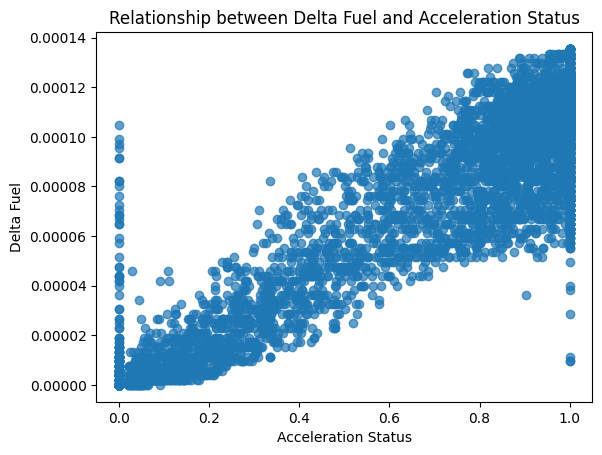

In [5]:
plt.xlabel('Acceleration Status')
plt.ylabel('Delta Fuel')
plt.title('Relationship between Delta Fuel and Acceleration Status')
plt.scatter(df['accStatus'], df['delta_fuel'], alpha=0.7)

# We need to work with individual laps

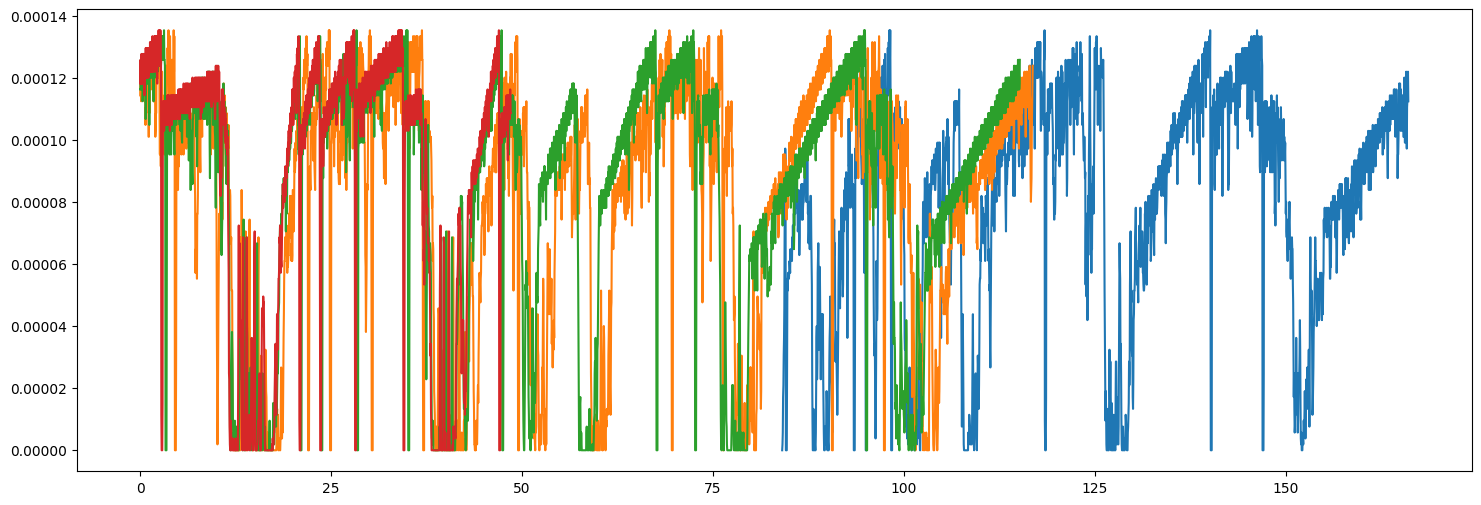

In [6]:
df['lap'] = (df['currentTime'].diff() < 0).cumsum()
lap_dict = {lap: group for lap, group in df.groupby('lap')}

plt.figure(figsize=(18,6))
for lap, lap_df in lap_dict.items():
    plt.plot(lap_df['currentTime'], lap_df['delta_fuel'])
plt.show()

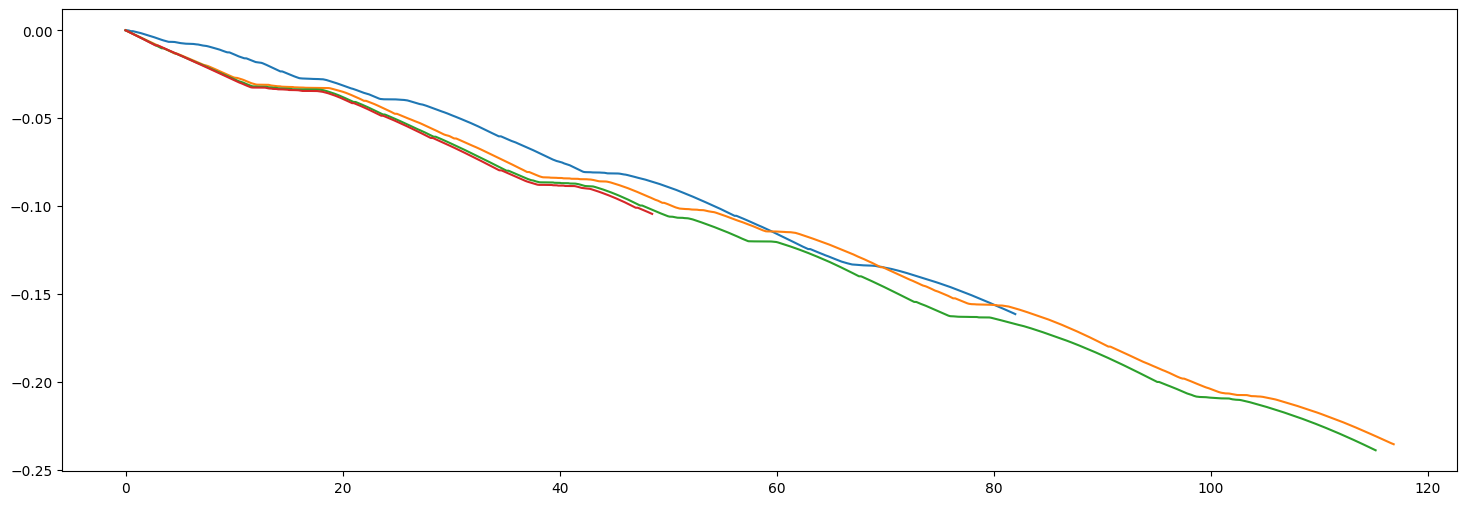

In [7]:
plt.figure(figsize=(18,6))
for lap, lap_df in lap_dict.items():
    plt.plot(lap_df['currentTime'] - lap_df['currentTime'].min() , lap_df['fuel'] - lap_df['fuel'].max())
plt.show()

In [8]:
# for lap, lap_df in lap_dict.items():
#     plt.figure(figsize=(18,6))
#     plt.plot(lap_df['currentTime'], lap_df['fuel'])
#     plt.show()

In [9]:
# for lap, lap_df in lap_dict.items():    
#     plt.figure(figsize=(18,6))
#     plt.plot(lap_df['currentTime'], lap_df['delta_fuel'])
#     plt.show()

## Total stats for the reward function

In [10]:
df[['reward', 'speed', 'gap', 'delta_fuel']].describe()


,reward,speed,gap,delta_fuel
count,9049.000000,9049.000000,9049.000000,9049.000000
mean,0.570097,48.589586,-0.018254,0.000082
std,0.179789,14.992154,0.428134,0.000041
min,0.000022,0.001820,-2.930425,0.000000
25%,0.440803,37.824993,-0.219002,0.000063
50%,0.568090,48.250904,-0.003141,0.000097
75%,0.735981,62.298737,0.217986,0.000113
max,0.873778,73.439438,1.539363,0.000135


### Last lap stats (the most successful)

In [11]:
last_lap = max(lap_dict.keys())  # Get the highest lap number
last_lap_df = lap_dict[last_lap]  # Retrieve the corresponding DataFrame

# Display the statistics for the last lap
last_lap_df[['reward', 'speed', 'gap', 'delta_fuel']].describe()


,reward,speed,gap,delta_fuel
count,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.582837,49.431885,-0.020492,0.000086
std,0.214408,17.839602,0.393350,0.000045
min,0.192448,17.124147,-1.924138,0.000000
25%,0.389342,33.194149,-0.167822,0.000061
50%,0.622698,52.293587,0.029857,0.000107
75%,0.789170,66.402630,0.163940,0.000118
max,0.873778,73.439438,0.932126,0.000135


### First lap stats (the least successful)

In [12]:
first_lap = min(lap_dict.keys())  # Get the highest lap number
first_lap_df = lap_dict[first_lap]  # Retrieve the corresponding DataFrame

# Display the statistics for the last lap
first_lap_df[['reward', 'speed', 'gap', 'delta_fuel']].describe()

,reward,speed,gap,delta_fuel
count,2046.000000,2046.000000,2046.000000,2046.000000
mean,0.526875,45.256096,-0.074246,0.000079
std,0.176097,14.662234,0.530417,0.000037
min,0.000022,0.001820,-1.804323,0.000000
25%,0.427781,37.355476,-0.350649,0.000061
50%,0.524644,45.237862,-0.029204,0.000088
75%,0.673398,57.295608,0.242407,0.000107
max,0.817950,68.283707,1.500920,0.000135
